# Lab 8 : Star Formation 

In [29]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [30]:
def StarFormationRate(L,type,TIR=0):
    """Function that computes the star formation ratef of a galaxy
    following Kennicutt & Evans 2012 Eq 12 (ARA&A 50)
    
    INPUTS
    ------
        L: 'float'
            Luminosity of the galaxy in a given wavelength (erg/s)
        Type: 'string'
            The wavelength: 'FUV', 'NUV', 'TIR', 'Halpha'
        TIR: 'float'
            Total infrared Luminosity in erg/s (default = 0)
    OUTPUTS
    -------
    SFR: 'float'
        Log of the star formation rate (Msun/yr)
    """
    if (Type == 'FUV'):
        logCx = 43.35
        TIRc = 0.46
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Ha'):
        logCx = 41.27
        TIRc = 0.0024

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [31]:
#  WLM Dwarf Irregular Galaxy


In [32]:
#  N24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [33]:
def SFRMainSequence(Mstar,z):
    """Function that computes the average SFR of a galaxy
    as a function of stellar mass
    INPUTS
    MStar: 'float'
        Total mass of stars 
    z: 'float'
        redshift"""
    alpha = 0.7-0.13*z
    beta = 0.38+1.14*z -0.19*z**2
    logSFR = alpha*(np.log10(Mstar)-10.5) + beta
    return logSFR

# Step 2

In [34]:
# MW at z=0
MW_disk = 1e10

In [35]:
# MW at z = 1
print(10**SFRMainSequence(MW_disk, 0))

print(10**SFRMainSequence(MW_disk, 1))

1.0715193052376064
11.091748152624014


# Step 3

In [36]:
# create an array of stellar masses
Mass = np.linspace(1e9,1e12)

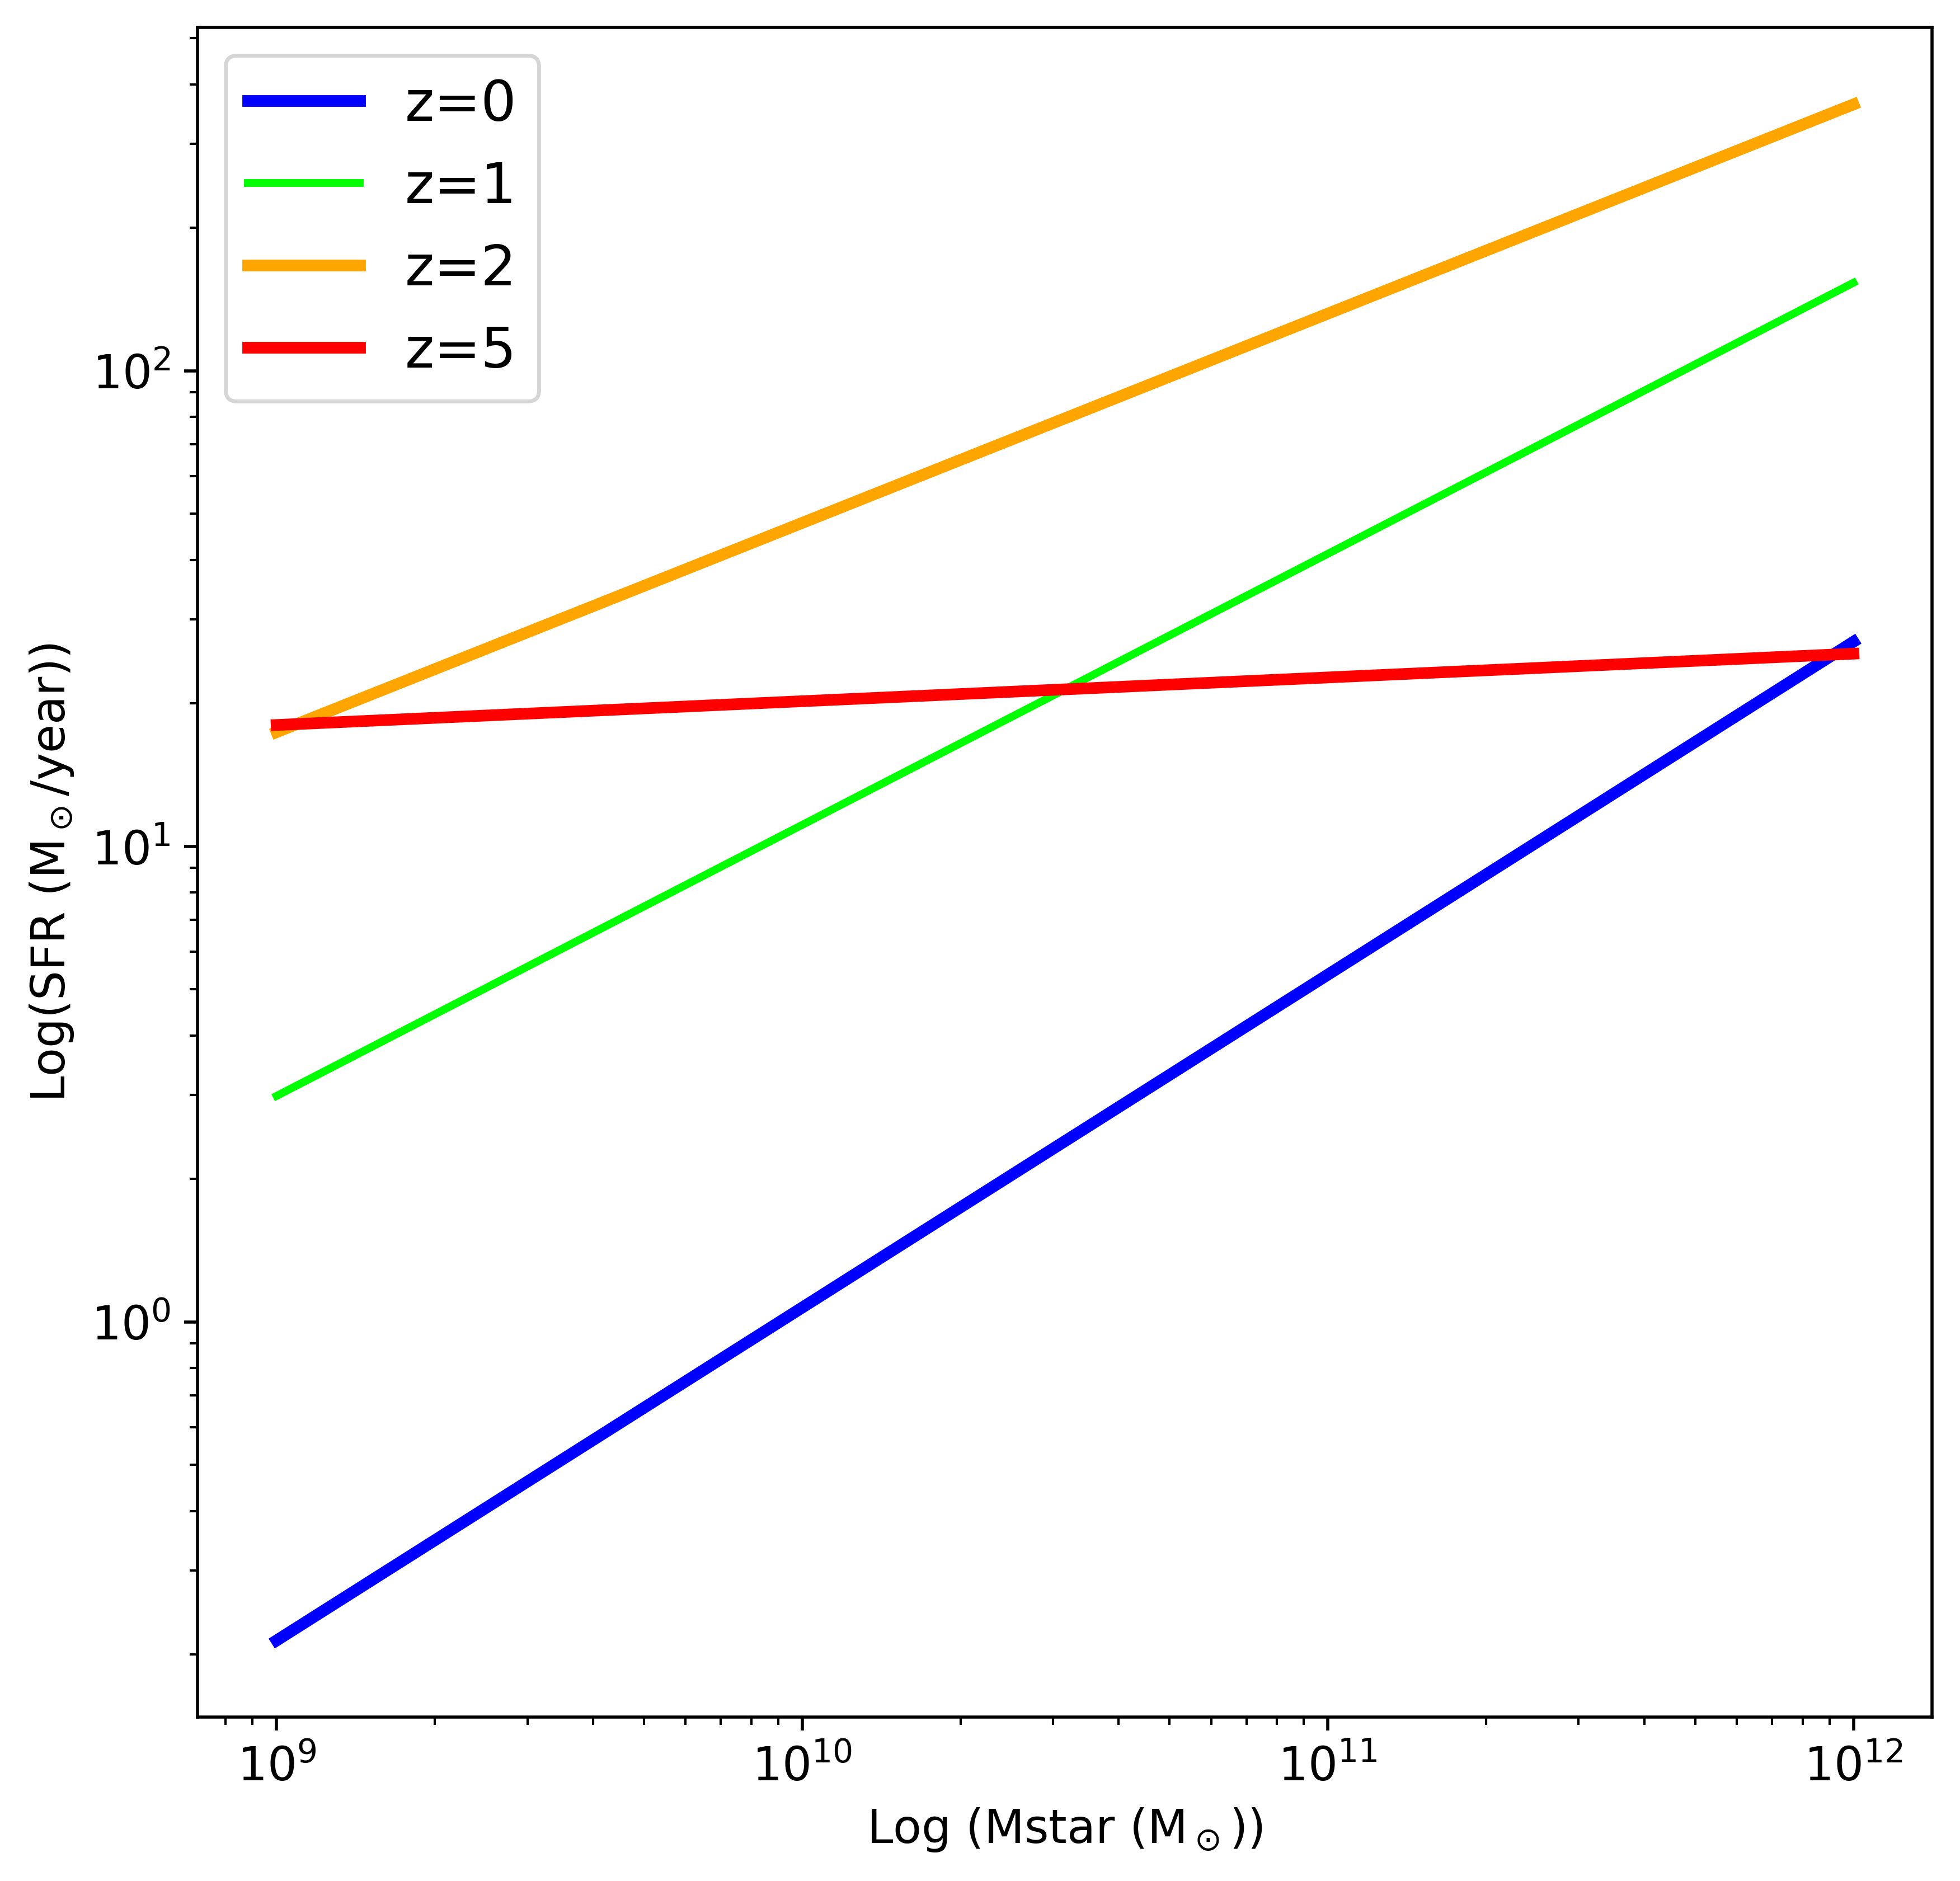

In [37]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass,0), color = 'blue', linewidth=3, label ='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass,1), color = 'lime', linewidth=2, label ='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass,2), color = 'orange', linewidth=3, label ='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass,5), color = 'red', linewidth=3, label ='z=5')
# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [38]:
# normal galaxies 
TIR_normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal,"TIR"))

NameError: name 'LsunErgS' is not defined

In [ ]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
print(10**StarFormationRate(TIR_LIRG,"TIR"))

In [ ]:
# ULIRGs
TIR_LIRG = 1e12*LsunErgS
print(10**StarFormationRate(TIR_ULIRG,"TIR"))

In [ ]:
# HLIRGs
TIR_LIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG,"TIR"))